# 💡 Understanding the Data

X (Featuers)
1. Metadata A + B = Socio Demographics Information (Quantitative + Categorical)
- -  A mix of categorical and numerical features (e.g., handedness, education level, parenting info, emotions).
2. Functional MRI Matrices (represents functional connectivity between different brain regions)

- Rows = Participants (Each row corresponds to one subject).
- Columns = Brain Region Pairs (Each value represents the functional connection strength between two regions).
- It is a 199 x 199 symmetric matrix, flattened into a single row per participant.

Combine these 3 for EDA and Model Training.

---

Y  (Output)
- There are 2 targets
 1. ADHD diagnosis (0- None, 1- ADHD)
 2. Sex_F (0- Male, 1 - Female)

- LABELS: ADHD diagnosis and sex.

---

Others

- Instrument_Description - Description about the types of Tests taken.
- EHQ – Edinburgh Handedness Questionnaire
- APQ –Alabama Parenting Questionnaire
- SDQ – Strength and Difficulties Questionnaire.

I believe these things are for knowledge and may be useful for features development and understanding.

---

The fMRI department has collected functional brain imaging data of
children and adolescents which are available to you together with their socio-demographic, emotions, and parenting information.

As there might be gender-based differences, the task is to build a model to **predict both an
individual’s sex and their ADHD diagnosis**  using this information.

---
Your task is to predict both ADHD diagnosis and sex using functional MRI data and socio-demographic information while ensuring the model is not biased, especially against female patients.

---

# 📌  Exploratory Data Analysis (EDA)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

For data visualization in 2D format

In [ ]:
pip install umap-learn

For MCA. Will use it to reduce data dimension for the categorical data B.

In [ ]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer
from prince import MCA

import umap.umap_ as umap
import pickle

## 1️⃣ Deeper Understanding of Data



### MetaData A

In [ ]:
# For Metadata A (Quantitative)
metadata_a = pd.read_excel("METADATA_A.xlsx")
metadata_a.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [ ]:
print(metadata_a.shape)  # Rows & Columns (1213, 19)
print(metadata_a.isnull().sum()) # missing Values - MRI_Track_Age_at_Scan         360

(1213, 19)
participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [ ]:
print(metadata_a.info())  # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [ ]:
# Check missing values across all columns
missing_values_a = metadata_a.isnull().sum()

missing_columns_a  = missing_values_a[missing_values_a > 0].index
missing_records_dfa = metadata_a[metadata_a[missing_columns_a].isnull().any(axis=1)]

missing_records_dfa.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
5,tBGXkEdv2cp7,83.34,2,5,12,35,16,15,21,4,17,0,12,9,8,5,5,3,NaN
11,6fpygdQTScAW,66.74,13,5,15,40,15,20,25,2,4,0,4,0,2,0,0,10,NaN


### Metadata B

In [ ]:
# For Metadata B  (Categorical)
metadata_b = pd.read_excel("METADATA_B.xlsx")
metadata_b.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [ ]:
print(metadata_b.shape)  # Rows & Columns (1213, 10)
print(metadata_b.isnull().sum()) # missing Values - PreInt_Demos_Fam_Child_Ethnicity    11

(1213, 10)
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [ ]:
print(metadata_b.info())  # Data types
# Categorical Data in numerical format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB
None


In [ ]:
# Check missing values across all columns
missing_values_b = metadata_b.isnull().sum()

missing_columns_b  = missing_values_b[missing_values_b > 0].index
missing_records_dfb = metadata_b[metadata_b[missing_columns_b].isnull().any(axis=1)]

missing_records_dfb.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
50,r44YD9eIqJ9u,2016,3,NaN,0,1,21,40,21,0
54,VZnIq2hRErI5,2017,1,NaN,0,2,21,25,18,15
103,cI2963FmxJti,2018,3,NaN,4,3,21,45,18,45
122,SZxlsOgwVT6D,2016,1,NaN,0,1,21,45,12,20
196,LPWm6w5QXeev,2016,1,NaN,0,1,6,0,0,0


### FUNCTIONAL_CONNECTOME_MATRICES

In [ ]:
# For Functional MRI Matrices
fmri_matrices = pd.read_csv("FUNCTIONAL_CONNECTOME_MATRICES.csv")
fmri_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
print(fmri_matrices.shape)  # Rows & Columns (1213, 19901)
print(fmri_matrices.isnull().sum()) # missing Values - None found

(1213, 19901)
participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [ ]:
missing_values = fmri_matrices.isnull().sum()
missing_values[missing_values > 0]

,0


In [ ]:
# Check missing values across all columns
missing_columns  = missing_values[missing_values > 0].index
missing_records_df = fmri_matrices[fmri_matrices[missing_columns].isnull().any(axis=1)]

missing_records_df.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn


In [ ]:
print(f"Total rows with missing values: {missing_records_df.shape[0]}") # apXT1ZuI5FLx or jA5iwa9nh8ed

Total rows with missing values: 0


In [ ]:
fmri_matrices[fmri_matrices["participant_id"] == "jA5iwa9nh8ed"]

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
80,jA5iwa9nh8ed,0.015019,0.171298,-0.007866,0.026381,0.033539,0.121241,0.123,0.080267,-0.012299,...,0.151905,-0.073514,-0.041812,0.067893,0.027103,0.049518,0.097233,0.163616,0.094943,0.138194


### Labels

In [ ]:
targets = pd.read_excel("LABELS.xlsx")
targets.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [ ]:
print(targets.shape)  # Rows & Columns (1213, 3)
print(targets.isnull().sum()) # missing Values - None found

(1213, 3)
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


💡Insights (Missing Values)
- METADATA A  (1213, 19)- MRI_Track_Age_at_Scan - 360
- METADATA B  (1213, 10)- PreInt_Demos_Fam_Child_Ethnicity - 11
- fmri_matrices (1213, 19901) - No record has missing Values
- targets (1213, 3) - No missing values.

- Total Features = 18+9+19900 = 19927 (not including participant_id)
---

In [ ]:
metadata_a.duplicated().sum()

np.int64(0)

In [ ]:
metadata_b.duplicated().sum()

np.int64(0)

In [ ]:
fmri_matrices.duplicated().sum()

np.int64(0)

In [ ]:
targets.duplicated().sum()

np.int64(0)

- The data seems to be not duplicated in their respective file.

## 2️⃣ Feature Understanding & Exploration


### 📊 For labels.

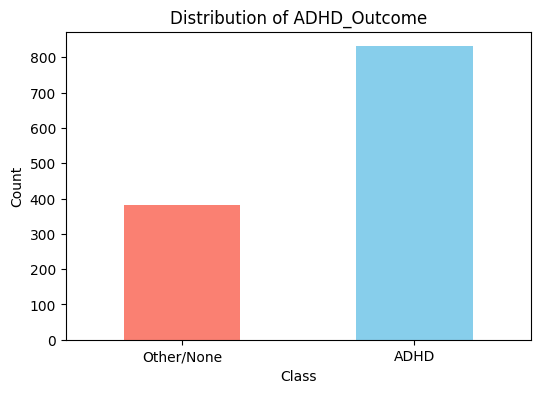

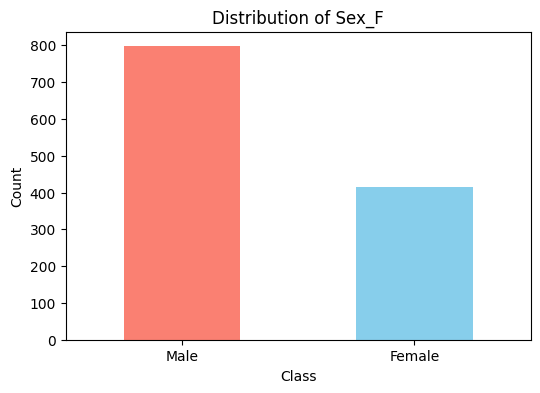

In [ ]:
columns_to_plot = ["ADHD_Outcome", "Sex_F"]

xtick_labels = {
    "ADHD_Outcome": {0: "Other/None", 1: "ADHD"},
    "Sex_F": {0: "Male", 1: "Female"}
}

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    targets[col].value_counts().sort_index().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(f"Distribution of {col}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=xtick_labels[col].values(), rotation=0)
    plt.show()

💡The distribution are not equal for both ADHD and Sex columns.
- Data regarding the ADHD is positive is 2x that of not having ADHD.
- In terms of sex 2x the Male data is collected than that of female.

More data should be collected or existing data should be discared until distribution is equal for the model to train. Training with such proportion could introduce bias to the model.

### 📊 For numerical variables:

- Histograms for quantative metadata A.
- HeatMap for feature Selection.

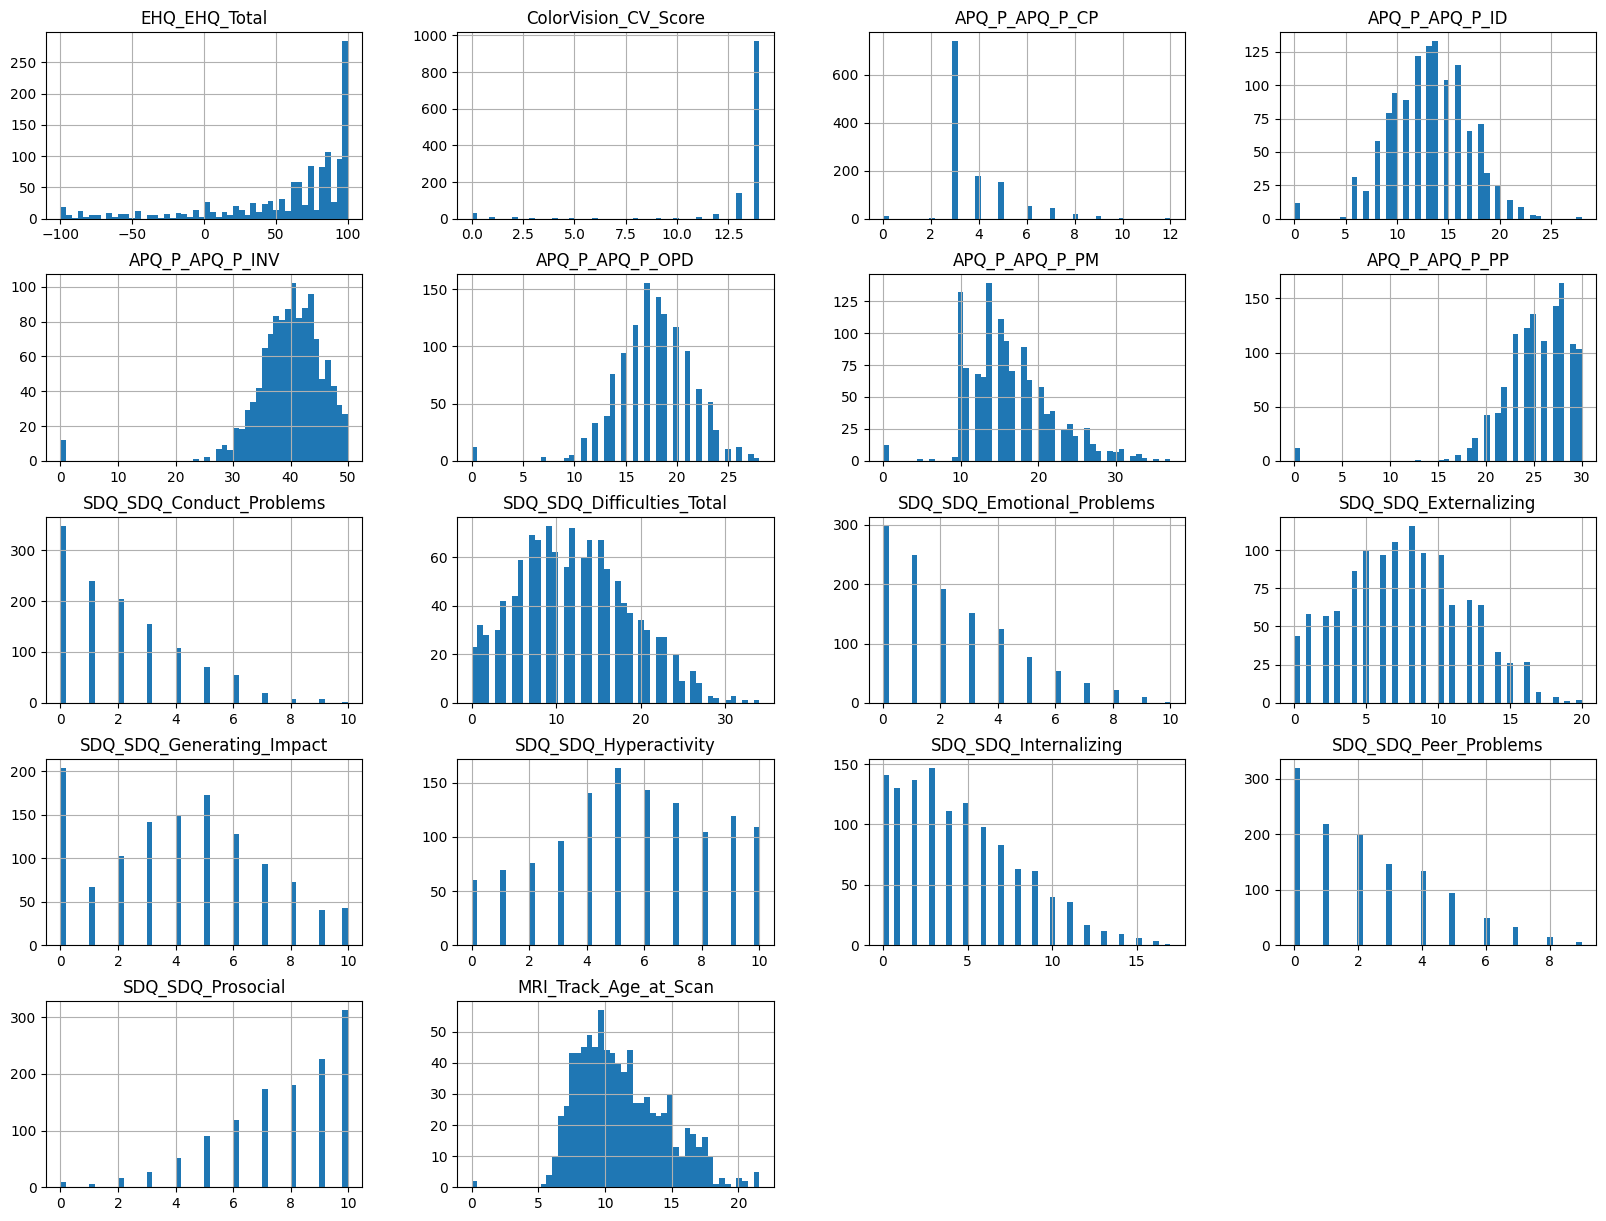

In [ ]:
# Plot the histogram for metadat_a
_ = metadata_a.hist(bins=50, figsize=(20,15))


💡Skewed Distributions

Left Skewed: EHQ, ColorVision, APQ_INV, APQ_PP, SDQ_Prosocial

Right Skewed: APQ_C, APQ_P_PM, Conduct Problems, Emotional Problem, SDQ_Internalizing and Peer Problems

Others are somewhat normally distributed.

According to the feature description, most of the features here are in scale. So, they apper in category-like.


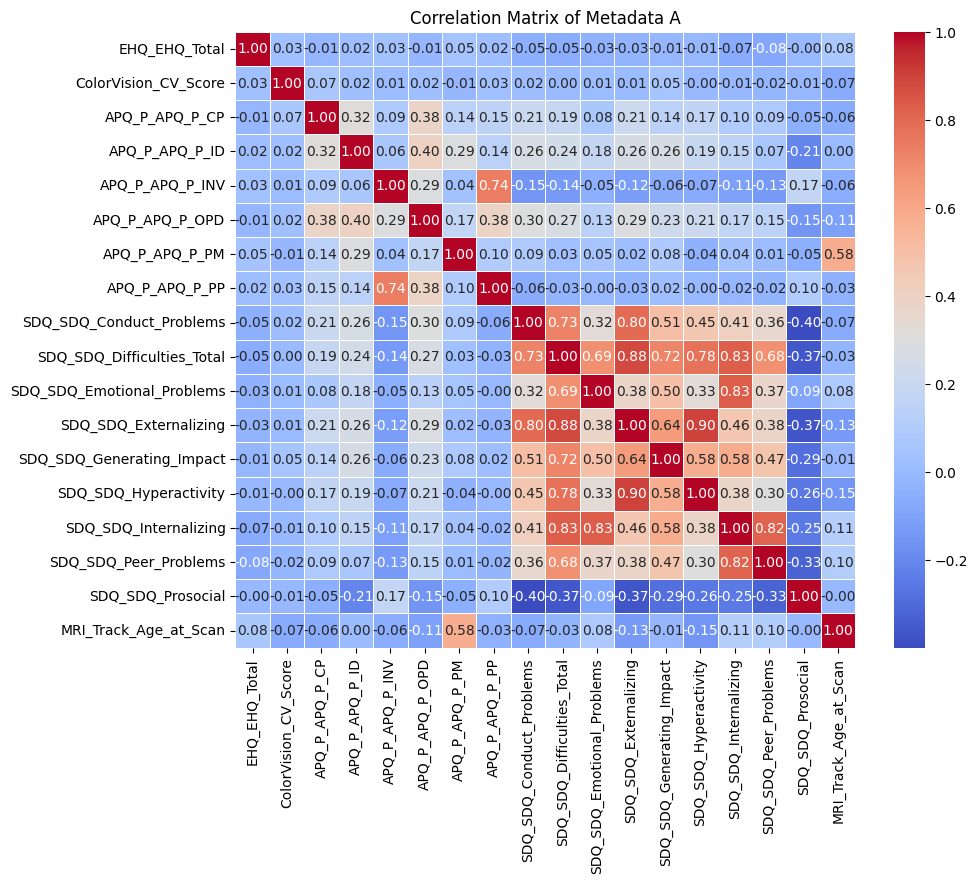

In [ ]:
# Correlation matrix
numerical_metadata_a = metadata_a.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_metadata_a.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Metadata A")
plt.show()


In [ ]:
corr_matrix = numerical_metadata_a.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Extracts the upper triangle of the matrix (including the diagonal).
high_corr_pairs = corr_matrix.where(mask).stack().reset_index() # Remove the null values and change to df

# Filter pairs with correlation higher than 0.8 or lower than -0.8
high_corr_pairs = high_corr_pairs[(high_corr_pairs[0] > 0.8) | (high_corr_pairs[0] < -0.8)]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] != 1.0] # dont include the diagonal ones as they are 1

high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr_pairs)

                      Feature 1              Feature 2  Correlation
128  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Externalizing     0.880004
131  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Internalizing     0.826949
139  SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Internalizing     0.833418
145       SDQ_SDQ_Externalizing  SDQ_SDQ_Hyperactivity     0.901635
162       SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems     0.819531


💡Numerical Feature Selection
- SDQ_SDQ_Externalizing and SDQ_SDQ_Internalizing are score which represents Problems and Emotions  they feel/show to the world. These problems and emotions are already detailed documented in terms of SDQ_SDQ_Difficulties_Total, SDQ_SDQ_Emotional_Problems, SDQ_SDQ_Hyperactivity and SDQ_SDQ_Peer_Problems.


Since, these details are more documented in them, i believe internalizing and externalizing can be removed.

In [ ]:
metadata_a = metadata_a.drop(columns=['SDQ_SDQ_Internalizing', 'SDQ_SDQ_Externalizing'])
metadata_a.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,0,5,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,7,8,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,5,7,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,9,10,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,4,10,3,9,8.940679


In [ ]:
metadata_a.shape

(1213, 17)

### 📊 For categorical variables:

- Plotting Bar plots for the features except participant_id as it is unique.
- Do some Grouping for the model traning based on feature knowledge.
- Modify some category data that have value of Zero.
- As it is a mixture of ordinal (rank) and nominal data, box plot is not good because the distribution can be seen exactly from the bar (count) box.

- If it is only ordinal (rank), box plot is good.

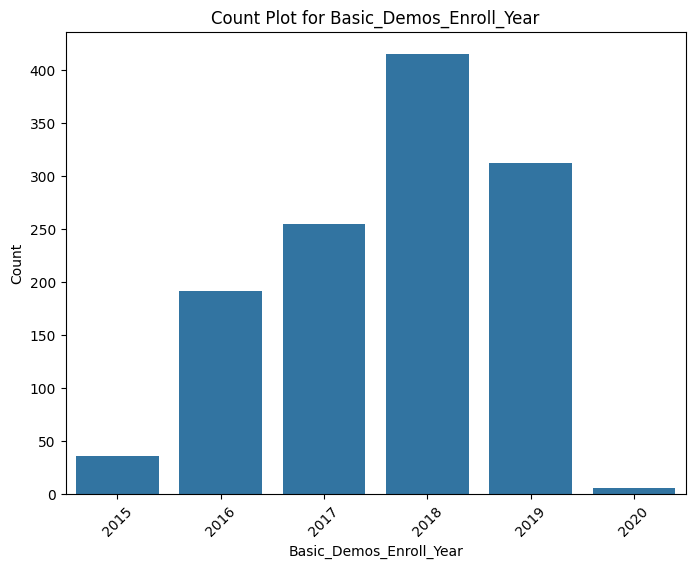

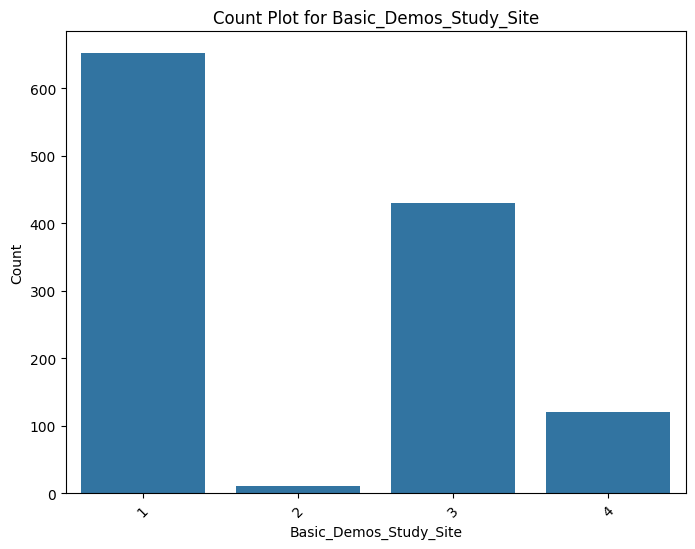

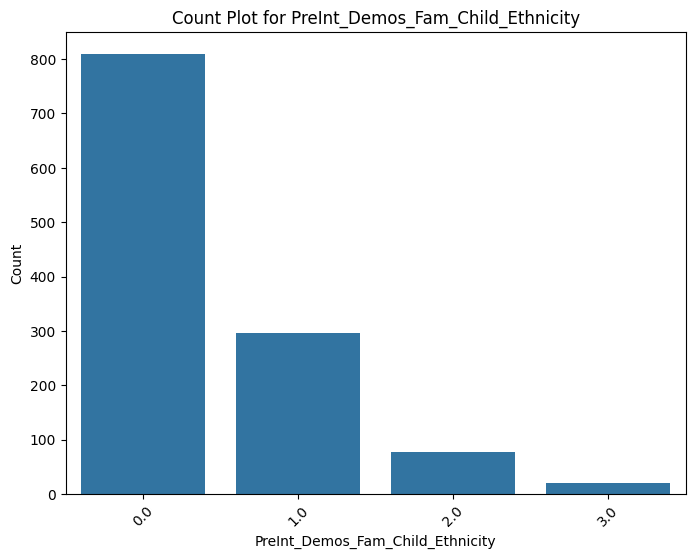

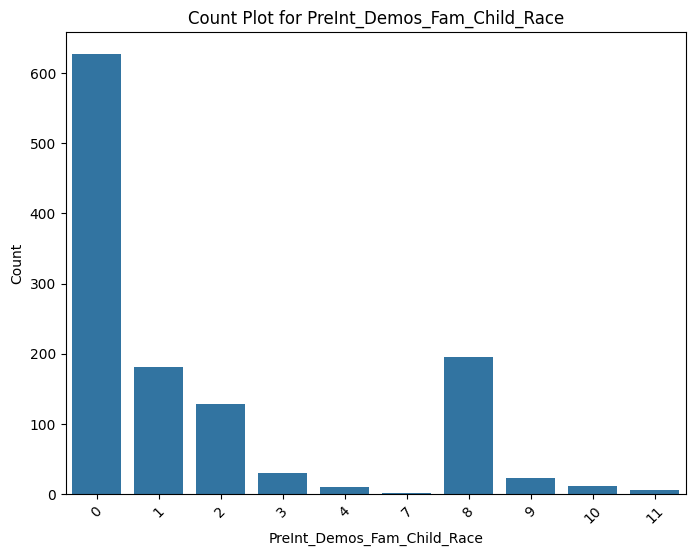

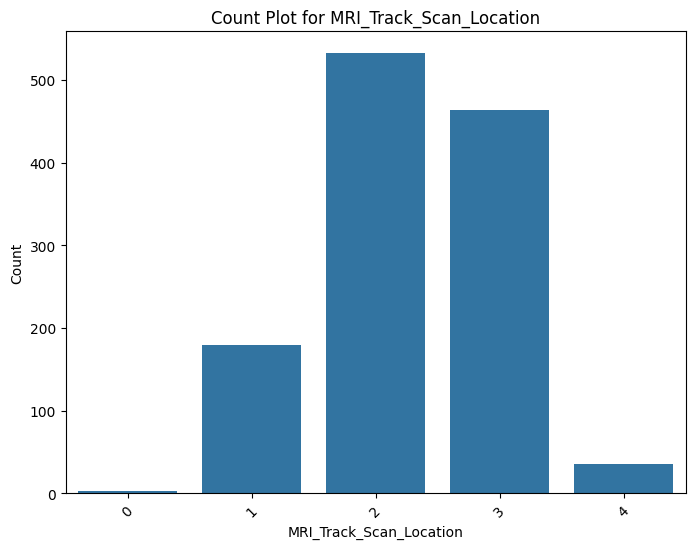

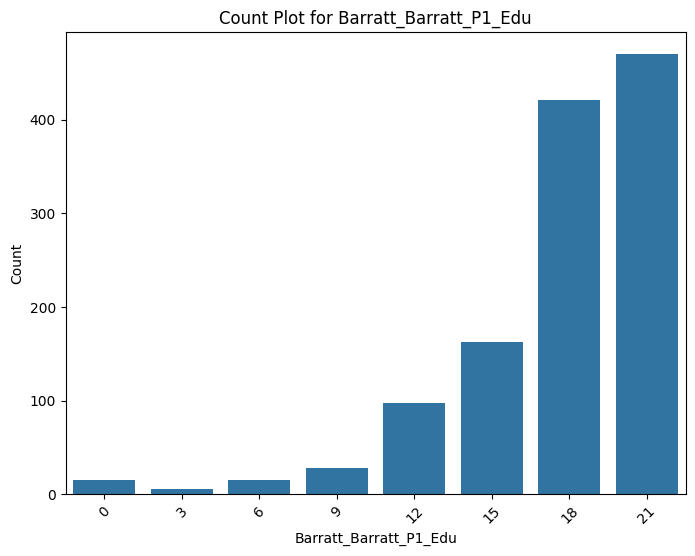

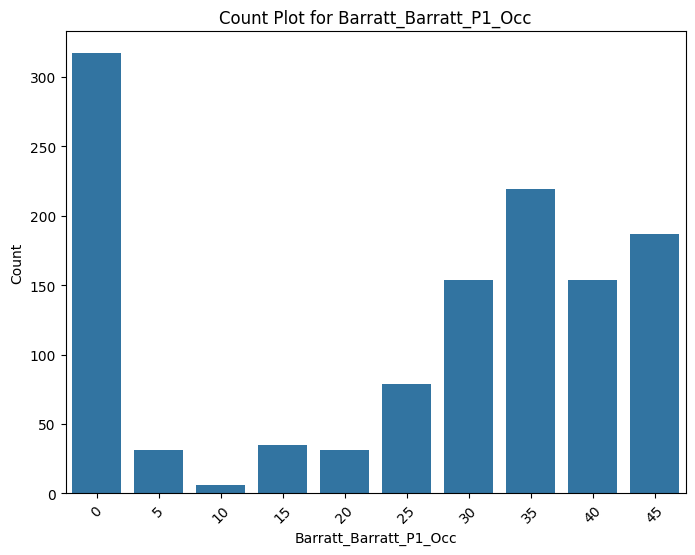

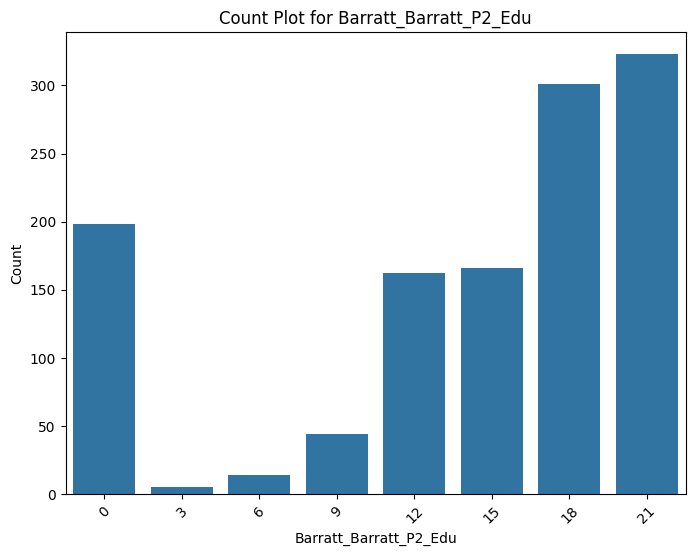

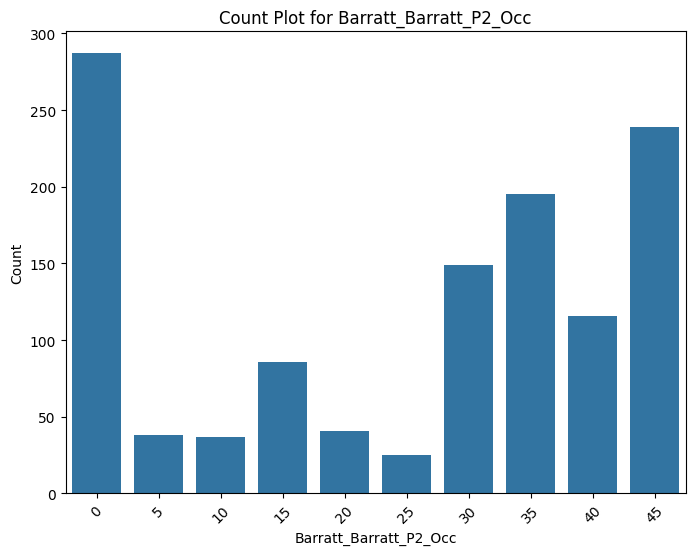

In [ ]:
# Bar plots (count plots) for each categorical column
categorical_cols = [col for col in metadata_b.columns if col != 'participant_id']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=metadata_b[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

💡Classes are not in good ratios. These are not good for model training.
- These things can be grouped to reduce the imbalance ratio.

- - Study site, Ethnicity and Race have meaning of their own. They cant be grouped to have a same meaning.
- - Others can be Grouped becasue after grouping, they still represent original meaning.

In [ ]:
def group_year(value):
    if value in [2015,2016]:
        return 1
    elif value == 2017:
        return 2
    elif value == 2018:
        return 3
    elif value in [2019,2020]:
        return 4
    else:
        return value  # Keep any unexpected values as they are

metadata_b["Basic_Demos_Enroll_Year"] = metadata_b["Basic_Demos_Enroll_Year"].apply(group_year)


In [ ]:
def group_education(value):
    if value in [0, 3, 6, 9, 12]:
        return 1
    elif value == 15:
        return 2
    elif value == 18:
        return 3
    elif value == 21:
        return 4
    else:
        return value  # Keep any unexpected values as they are

metadata_b["Barratt_Barratt_P1_Edu"] = metadata_b["Barratt_Barratt_P1_Edu"].apply(group_education)
metadata_b["Barratt_Barratt_P2_Edu"] = metadata_b["Barratt_Barratt_P2_Edu"].apply(group_education)


In [ ]:
def group_occ(value):
    if value == 0:
        return 1
    elif value in [5, 10, 15, 20, 25]:
        return 2
    elif value == 30:
        return 3
    elif value == 35:
        return 4
    elif value == 40:
        return 5
    elif value == 45:
        return 6
    else:
        return value  # Keep any unexpected values as they are

metadata_b["Barratt_Barratt_P1_Occ"] = metadata_b["Barratt_Barratt_P1_Occ"].apply(group_occ)
metadata_b["Barratt_Barratt_P2_Occ"] = metadata_b["Barratt_Barratt_P2_Occ"].apply(group_occ)

In [ ]:
def group_scanLoc(value):
    if value == 0:
        return 4
    else:
        return value  # Keep any unexpected values as they are

metadata_b["MRI_Track_Scan_Location"] = metadata_b["MRI_Track_Scan_Location"].apply(group_scanLoc)

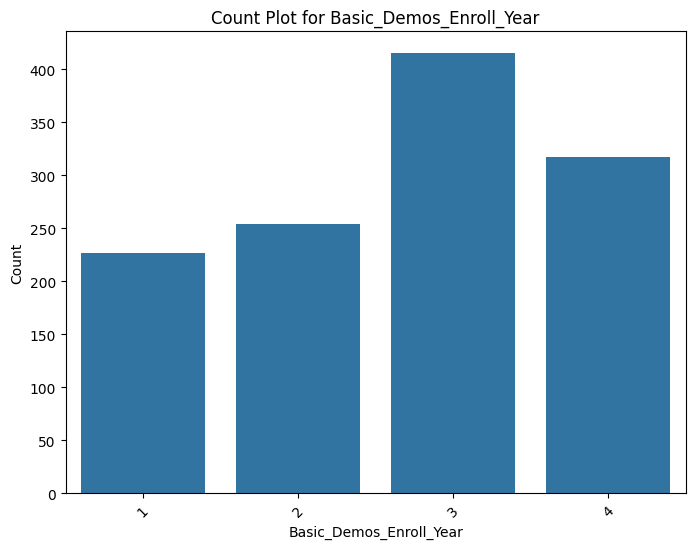

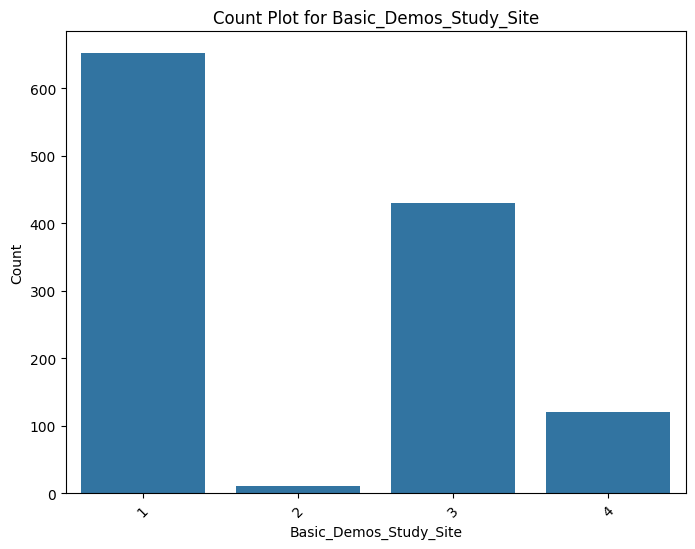

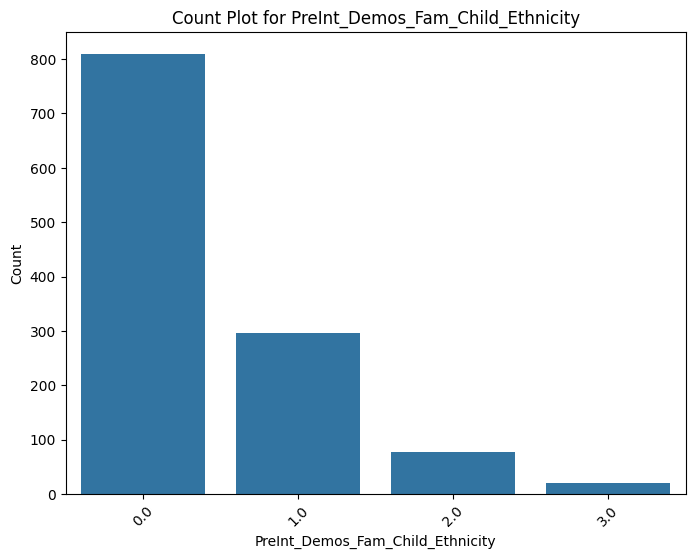

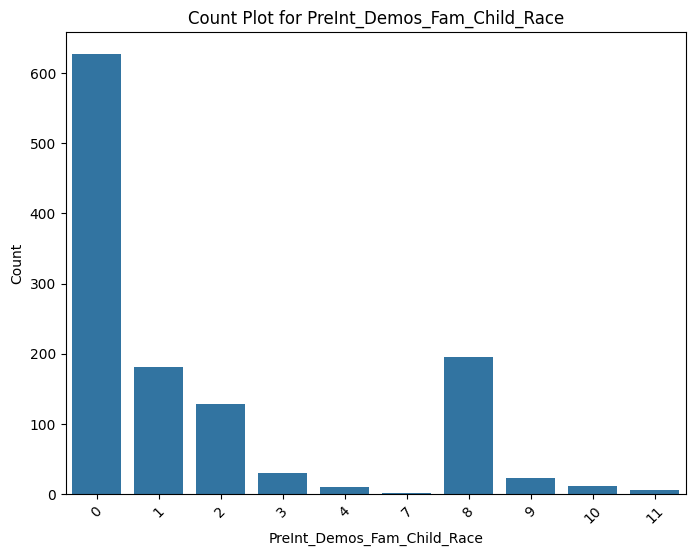

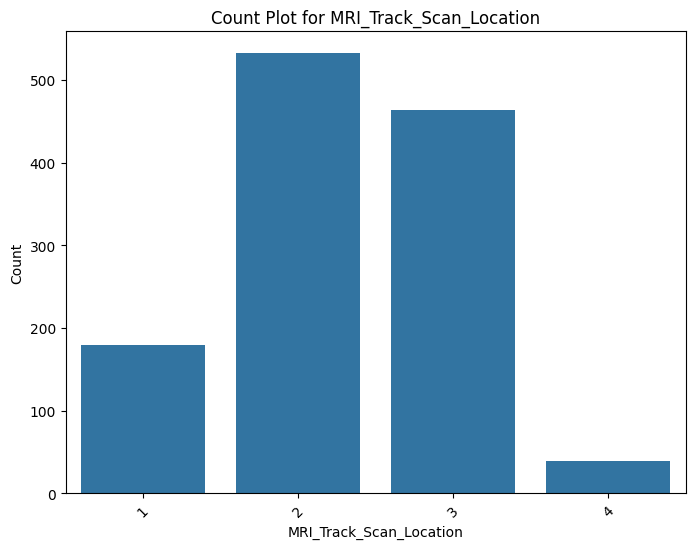

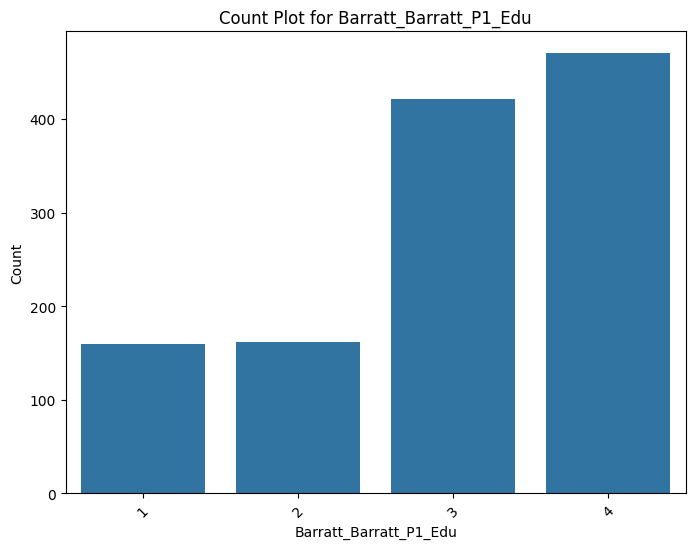

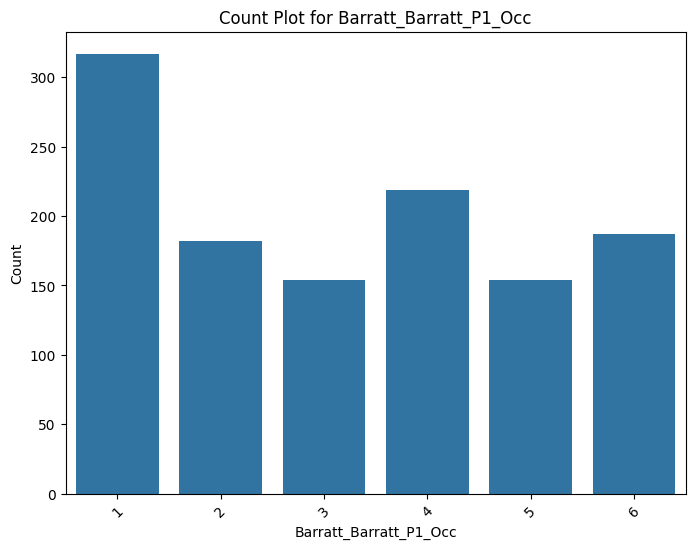

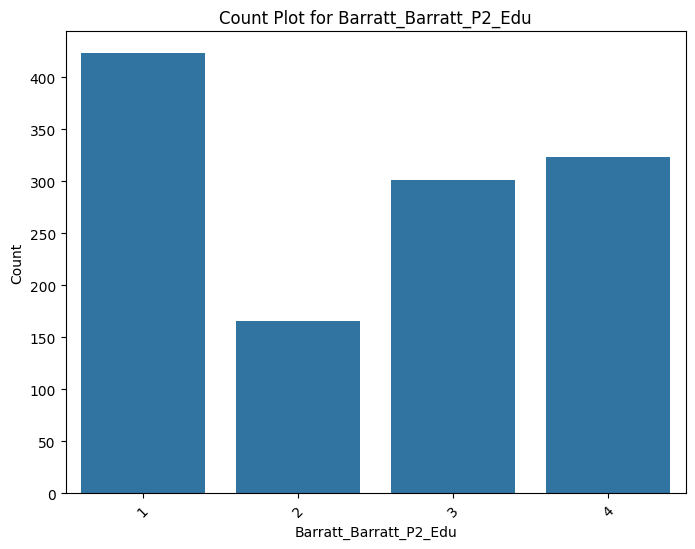

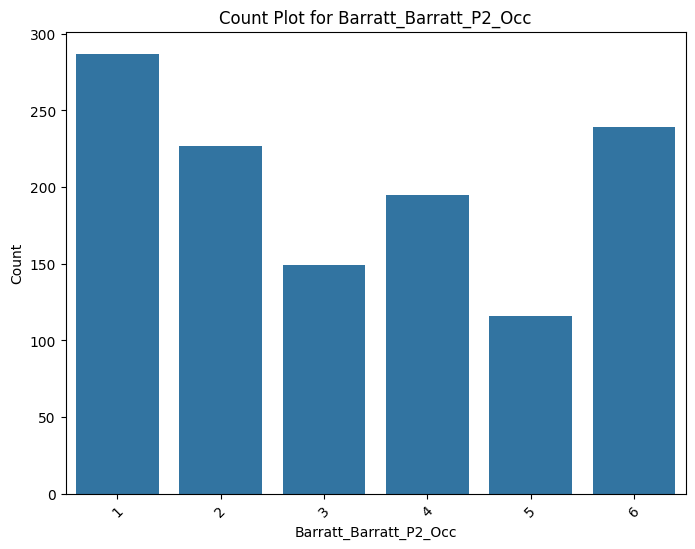

In [ ]:
# Plot bar plots (count plots) for each categorical column again
categorical_cols = [col for col in metadata_b.columns if col != 'participant_id']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=metadata_b[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

💡 Insights

- After modifying the categorical data, the distribution became somwhat good for the model training. However, there are some features such as PreInt_Demos_Fam_Child_Race/ Ethnicity and Study site, which require more transformations to make the distribtion good for the model. One thing is to collect more data regarding to these cases.

- Now with the current distribution, we can check the mutal relationship within the features to apply feature selection.

Checking Mutual relationship between the categorical data for feature selection.

Mutual information measures the amount of information obtained about one random variable (the target) through another random variable (the feature). It is a non-parametric method that can capture both linear and non-linear relationships between variables.

In [ ]:
# For Female

combined_cat = metadata_b.merge(targets, on='participant_id')

female_df = combined_cat[combined_cat['Sex_F'] == 1] # Select only female
X = female_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
X = X.dropna(axis=1)
y = female_df['ADHD_Outcome']

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False) # Top Features
print(mi_df)


                       Feature  MI Score
4       Barratt_Barratt_P1_Edu  0.014270
0      Basic_Demos_Enroll_Year  0.005276
3      MRI_Track_Scan_Location  0.004119
1       Basic_Demos_Study_Site  0.003963
2  PreInt_Demos_Fam_Child_Race  0.000000
5       Barratt_Barratt_P1_Occ  0.000000
6       Barratt_Barratt_P2_Edu  0.000000
7       Barratt_Barratt_P2_Occ  0.000000


In [ ]:
# For Male

male_df = combined_cat[combined_cat['Sex_F'] == 0] # Select only Male
X = male_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])  # Drop the targets
X = X.dropna(axis=1)
y = male_df['ADHD_Outcome']

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame to visualize feature importance
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display top features
print(mi_df)

                       Feature  MI Score
3      MRI_Track_Scan_Location  0.028646
5       Barratt_Barratt_P1_Occ  0.012794
6       Barratt_Barratt_P2_Edu  0.006068
0      Basic_Demos_Enroll_Year  0.003488
2  PreInt_Demos_Fam_Child_Race  0.000000
1       Basic_Demos_Study_Site  0.000000
4       Barratt_Barratt_P1_Edu  0.000000
7       Barratt_Barratt_P2_Occ  0.000000


 💡 From above observation after careful brainstorming with the meaning of each feature, I believe that race has nothing to do with the ADHD on both male and female.
So, dropping it.

In [ ]:
metadata_b = metadata_b.drop(columns=['PreInt_Demos_Fam_Child_Race'])
metadata_b.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,1,1,0.0,1,4,6,4,6
1,CPaeQkhcjg7d,4,3,1.0,3,2,2,1,1
2,Nb4EetVPm3gs,1,1,1.0,1,3,5,1,1
3,p4vPhVu91o4b,3,3,0.0,3,2,3,3,1
4,M09PXs7arQ5E,4,3,0.0,3,2,2,1,1


### 📊 For FMRI_Matrices:

Visualizing 19,901 columns individually is unrealistic

- Took only a sample subset of columns to plot histograms
- Goal is the check if the distributions are skewed or not!


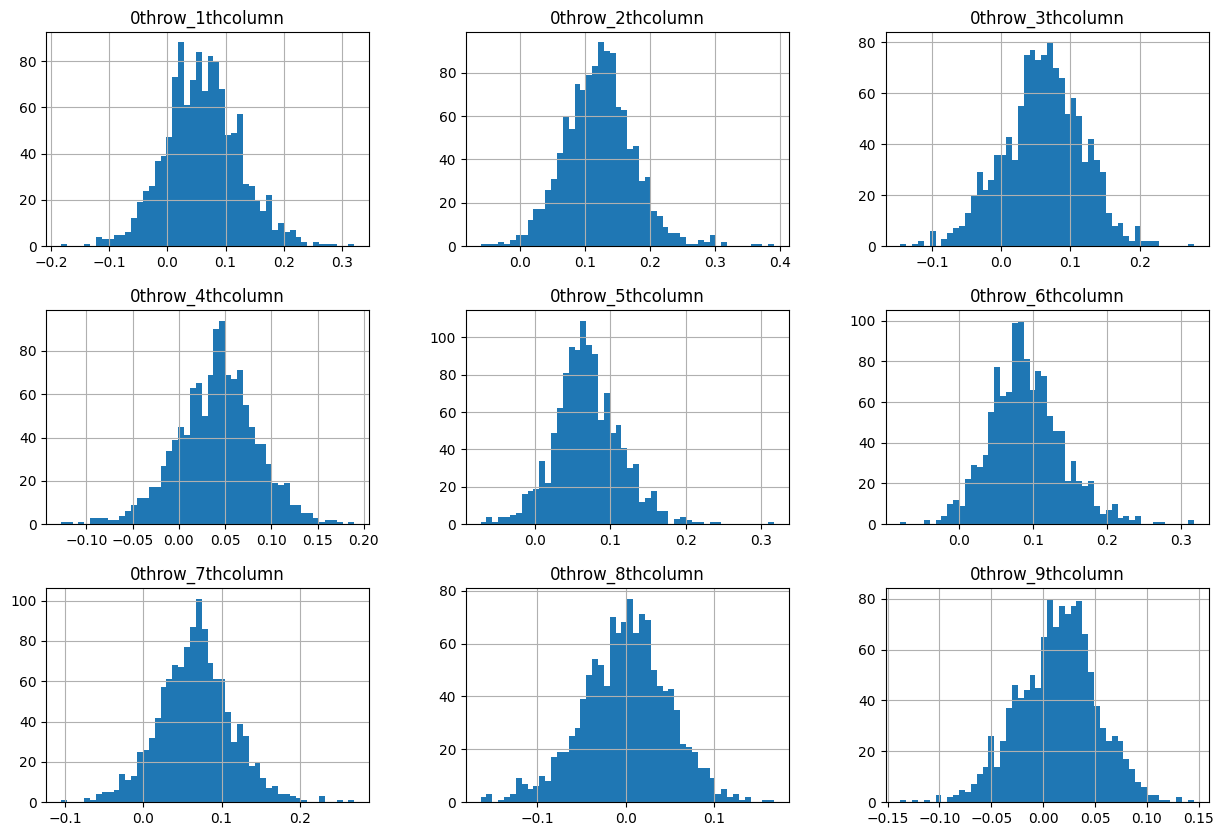

In [ ]:
sample_columns = fmri_matrices.columns[1:10]  # Select first 10 fMRI features (excluding participant_id)
fmri_matrices[sample_columns].hist(figsize=(15, 10), bins=50)
plt.show()

In [ ]:
fmri_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
numerical_cols = fmri_matrices.select_dtypes(include=['int64', 'float64']).columns  # Remove participant_id

skewness_values = fmri_matrices[numerical_cols].skew().sort_values()

# Categorize into Left Skewed, Right Skewed, and Normal
left_skewed = skewness_values[skewness_values < -0.5]
right_skewed = skewness_values[skewness_values > 0.5]
normal_skew = skewness_values[(skewness_values >= -0.5) & (skewness_values <= 0.5)]

# Print top 10 from each category
print("\n Top 10 Left-Skewed Features (Skewness < -0.5):")
print(left_skewed.head(10))
print(f"Total: {len(left_skewed)}")

print("\n Top 10 Right-Skewed Features (Skewness > 0.5):")
print(right_skewed.tail(10))  # Using tail() to get highest values first
print(f"Total: {len(right_skewed)}")

print("\n Top 10 Normally Distributed Features (-0.5 <= Skewness <= 0.5):")
print(normal_skew.sample(10))  # Random 10 since normal ones are not ordered
print(f"Total: {len(normal_skew)}")



 Top 10 Left-Skewed Features (Skewness < -0.5):
9throw_106thcolumn    -0.681590
11throw_109thcolumn   -0.557406
10throw_108thcolumn   -0.502661
dtype: float64
Total: 3

 Top 10 Right-Skewed Features (Skewness > 0.5):
96throw_194thcolumn     0.692738
18throw_84thcolumn      0.730863
112throw_137thcolumn    0.765402
18throw_37thcolumn      0.793650
85throw_98thcolumn      0.825043
7throw_9thcolumn        0.858482
9throw_108thcolumn      0.876481
26throw_136thcolumn     0.947537
106throw_108thcolumn    1.023073
74throw_105thcolumn     1.024060
dtype: float64
Total: 35

 Top 10 Normally Distributed Features (-0.5 <= Skewness <= 0.5):
97throw_119thcolumn    -0.035555
89throw_109thcolumn     0.024549
182throw_186thcolumn    0.246151
128throw_141thcolumn    0.048064
106throw_140thcolumn   -0.051531
74throw_131thcolumn     0.117421
94throw_122thcolumn    -0.089258
116throw_175thcolumn   -0.158067
171throw_173thcolumn   -0.085008
55throw_96thcolumn      0.132347
dtype: float64
Total: 19862


💡 Most of the features 19862 features are normally distribute and only 35 Right Skew and 3 Left skew are found.

- Based on this finding, I believe it is unnecessy to do extra transformation for the model training.

## 3️⃣ Merging and Splitting Data for Training & Testing


✅ Steps:
- Combine the dataset using the participant_id
- Separate features and target
- Train-test split
- Clean the data for missing values.
- Set stratify!

In [ ]:
data = metadata_a.merge(metadata_b, on='participant_id', how='inner')
data = data.merge(fmri_matrices, on='participant_id', how='inner')
data = data.merge(targets, on='participant_id', how='inner')

In [ ]:
data.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


In [ ]:
data.shape

(1213, 19927)

In [ ]:
# Drop participant_id as it's not needed for modeling
data.drop(columns=['participant_id'], inplace=True)

X = data.drop(columns=['ADHD_Outcome', 'Sex_F'])  # Features
y = data[['ADHD_Outcome', 'Sex_F']]  # Targets

In [ ]:
#  Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y[['ADHD_Outcome', 'Sex_F']], random_state=42
)
# This will normally distribute both Male and Female and also ADHD presence to Train and Test!

#### Start Cleaning the data

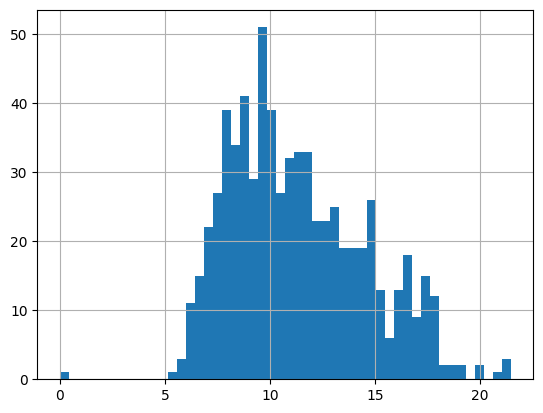

Skewness: 0.5166352430083219


In [ ]:
X_train["MRI_Track_Age_at_Scan"].hist(bins=50)
plt.show()
print("Skewness:", X_train['MRI_Track_Age_at_Scan'].skew())


# If skew > 0.5 or < -0.5, it is skewed
# If data is l/R Skewed -> Medium (For better distribution)
# If data is bell shaped -> Mean


- Having age 0 with ADHD is not a valid data.
- I blieve it is a data recording error and it would mean more to set it to age 5 as this is the mininum age.
- To solve the missing values in numerical data from metatdata A, KNNImputer can be used. It will apply KNN algo on the entire data to set a value for the missing values.

In [ ]:
X_train["MRI_Track_Age_at_Scan"] = X_train["MRI_Track_Age_at_Scan"].apply(lambda x: 5 if x <= 5 else x) # if less than 5, set 5

knn_imputer = KNNImputer(n_neighbors=5) # To fill the missing numerical data


In [ ]:
print("Before MRI_Track_Age_at_Scan missing count:", X_train['MRI_Track_Age_at_Scan'].isnull().sum())
print("Before PreInt_Demos_Fam_Child_Ethnicity missing count:", X_train['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())

# Fill missing values in Metadata A (Quantitative)
# X_train['MRI_Track_Age_at_Scan'] = X_train['MRI_Track_Age_at_Scan'].fillna(metadata_a['MRI_Track_Age_at_Scan'].median())
X_train["MRI_Track_Age_at_Scan"] = knn_imputer.fit_transform(X_train[["MRI_Track_Age_at_Scan"]])

# Fill mdissing values in Metadata B (Categorical)
X_train['PreInt_Demos_Fam_Child_Ethnicity'] = X_train['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3.0) # Filling with unkown float type

print("MRI_Track_Age_at_Scan missing count:", X_train['MRI_Track_Age_at_Scan'].isnull().sum())
print("PreInt_Demos_Fam_Child_Ethnicity missing count:", X_train['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())


Before MRI_Track_Age_at_Scan missing count: 280
Before PreInt_Demos_Fam_Child_Ethnicity missing count: 9
MRI_Track_Age_at_Scan missing count: 0
PreInt_Demos_Fam_Child_Ethnicity missing count: 0


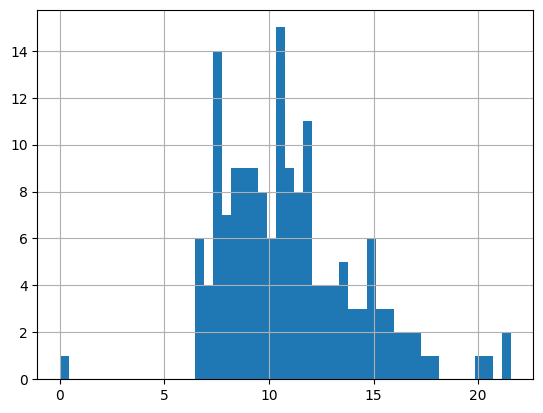

Skewness: 0.672135489042307


In [ ]:
X_test["MRI_Track_Age_at_Scan"].hist(bins=50)
plt.show()
print("Skewness:", X_test['MRI_Track_Age_at_Scan'].skew())

# If skew > 0.5 or < -0.5, it is skewed
# If data is l/R Skewed -> Medium (For better distribution)
# If data is bell shaped -> Mean

In [ ]:
X_test["MRI_Track_Age_at_Scan"] = X_test["MRI_Track_Age_at_Scan"].apply(lambda x: 5 if x <= 5 else x)

print("Before MRI_Track_Age_at_Scan missing count:", X_test['MRI_Track_Age_at_Scan'].isnull().sum())
print("Before PreInt_Demos_Fam_Child_Ethnicity missing count:", X_test['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())

# Fill missing values in Metadata A (Quantitative)
# X_test['MRI_Track_Age_at_Scan'] = X_test['MRI_Track_Age_at_Scan'].fillna(metadata_a['MRI_Track_Age_at_Scan'].mean())
X_test["MRI_Track_Age_at_Scan"] = knn_imputer.fit_transform(X_test[["MRI_Track_Age_at_Scan"]])

# Fill mdissing values in Metadata B (Categorical)
X_test['PreInt_Demos_Fam_Child_Ethnicity'] = X_test['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3.0) # Filling with unkown float type

print("MRI_Track_Age_at_Scan missing count:", X_test['MRI_Track_Age_at_Scan'].isnull().sum())
print("PreInt_Demos_Fam_Child_Ethnicity missing count:", X_test['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())


Before MRI_Track_Age_at_Scan missing count: 80
Before PreInt_Demos_Fam_Child_Ethnicity missing count: 2
MRI_Track_Age_at_Scan missing count: 0
PreInt_Demos_Fam_Child_Ethnicity missing count: 0


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((970, 19924), (243, 19924), (970, 2), (243, 2))

In [ ]:
print("Training Data Class Distribution:")
print(y_train.value_counts().sort_index())

print("\nTesting Data Class Distribution:")
print(y_test.value_counts().sort_index())


Training Data Class Distribution:
ADHD_Outcome  Sex_F
0             0        173
              1        133
1             0        464
              1        200
Name: count, dtype: int64

Testing Data Class Distribution:
ADHD_Outcome  Sex_F
0             0         43
              1         33
1             0        117
              1         50
Name: count, dtype: int64


According to the distribution, there is a clear imbalance, especially for (0,1) and (1,1) in the training data.

I have tried SMOTE method especially with the border-line SMOTE but it did not improved the performance. So, sticking up with this.

### Applying Dimension Reducing Techniques for all features.

- Since there are less than 10 columns in the Metadata A, I prefer not to apply the feature reduction techniques. Beause there is a varience issue which means all the information will not be retained if diimension reduction techniques are applied. For the numerical data, PCA can be applied but I am not applying it as the features are less than 10.

- For the Metadata B (categorical data), MCA - Multiple correspondence analysis can be used. I works really well for the categorial data.

- For the brian FMIR data, KernelPCA can be applied. KernelPCA is good as it helps to reduce the dimension well for the data nature (brian).


#### FMRI data reduction

In [ ]:
brain_features = fmri_matrices.columns.drop('participant_id')
categorical_features = metadata_b.columns.drop('participant_id')
numerical_features = metadata_a.columns.drop('participant_id')

In [ ]:
# For the Brian Data
scaler = StandardScaler()
X_train_brain_scaled = scaler.fit_transform(X_train[brain_features])
X_test_brain_scaled = scaler.transform(X_test[brain_features])

In [ ]:
print(X_train_brain_scaled.shape)
print(np.isnan(X_train_brain_scaled).sum())

(970, 19900)
0


In [ ]:
# KernelPCA Hyperparameter Tuning
# param_grid = {
#     'kpca__n_components': [10, 20, 50, 100, 200],
#     'kpca__kernel': ['rbf', 'poly', 'sigmoid'],
#     "kpca__gamma": [0.01, 0.1, 1, 10],
#     "kpca__alpha": [0.1, 1, 10]
# }
param_grid = {
    'kpca__n_components': [10],
    'kpca__kernel': ['rbf'],
    "kpca__gamma": [0.01],
    "kpca__alpha": [0.1]
}

pipeline = Pipeline([
    ('kpca', KernelPCA(n_jobs=-1))
])
search = GridSearchCV(pipeline, param_grid, cv=5, scoring='explained_variance', verbose=2, n_jobs=-1)
search.fit(X_train_brain_scaled)

best_kpca = search.best_estimator_.named_steps['kpca']
print("Best KernelPCA Params:", search.best_params_)

# Best KernelPCA Params: {'kpca__gamma': None, 'kpca__kernel': 'rbf', 'kpca__n_components': 10}
# Best KernelPCA Params: {'kpca__gamma': 0.01, 'kpca__kernel': 'rbf', 'kpca__n_components': 20}
# Best KernelPCA Params: {'kpca__alpha': 0.1, 'kpca__gamma': 0.01, 'kpca__kernel': 'rbf', 'kpca__n_components': 10}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best KernelPCA Params: {'kpca__alpha': 0.1, 'kpca__gamma': 0.01, 'kpca__kernel': 'rbf', 'kpca__n_components': 10}


Based on the explained Varience with the hyper parameter tuning using the grid seach, the Best KernelPCA Params are {'kpca__alpha': 0.1, 'kpca__gamma': 0.01, 'kpca__kernel': 'rbf', 'kpca__n_components': 10}

In [ ]:
X_train_brain_kpca = best_kpca.transform(X_train_brain_scaled)
X_test_brain_kpca = best_kpca.transform(X_test_brain_scaled)

X_train_brain_kpca = pd.DataFrame(X_train_brain_kpca, index=X_train.index,
                                  columns=[f'kpca_{i}' for i in range(X_train_brain_kpca.shape[1])])
X_test_brain_kpca = pd.DataFrame(X_test_brain_kpca, index=X_test.index,
                                 columns=[f'kpca_{i}' for i in range(X_test_brain_kpca.shape[1])])

In [ ]:
X_train_brain_scaled.shape, X_train_brain_kpca.shape

((970, 19900), (970, 7))

After applying the KernelPCA on the dataset for the FMRI data, the features are reduced from 19900 to just 10. THis is a really good approach with much varience retained.

#### Metadata B data reduction


MCA Eigenvalues: [0.34575675 0.25152948 0.23360853 0.19817724 0.19016929 0.16888124
 0.15875641]
Cumulative explained inertia: [0.22351895 0.38612345 0.53714272 0.66525697 0.78819438 0.89736985
 1.        ]


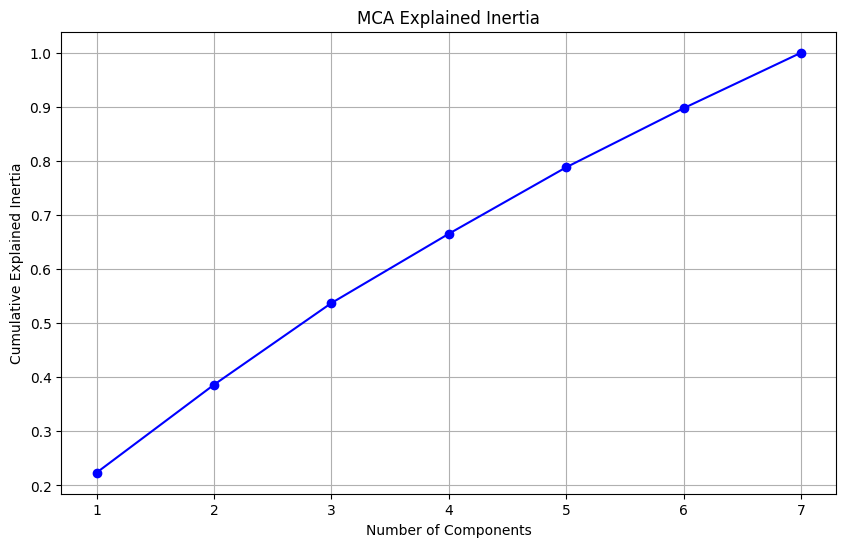

In [ ]:
# For Metadata B
X_train_cat = X_train[categorical_features].astype('category')
X_test_cat = X_test[categorical_features].astype('category')

X_train_cat_coded = X_train_cat.apply(lambda x: x.cat.codes)
X_test_cat_coded = X_test_cat.apply(lambda x: x.cat.codes)

mca = MCA(n_components=min(X_train_cat.shape) - 1, n_iter=20, random_state=42)
mca.fit(X_train_cat_coded)

eigenvalues = mca.eigenvalues_
print("\nMCA Eigenvalues:", eigenvalues)

explained_inertia = eigenvalues / eigenvalues.sum()
cumulative_inertia = np.cumsum(explained_inertia)
print("Cumulative explained inertia:", cumulative_inertia)

# Plotting to find the best optimal componet
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_inertia) + 1), cumulative_inertia, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Inertia')
plt.title('MCA Explained Inertia')
plt.grid()
plt.show()

According to the graph, the best optimal component is at 7 which will retained the 100% of the Inertia. But, the best optimal can be chosen 5 or 6. These components might work the best but the less info will be retained if we choose them for the model to learn.

In [ ]:
n_components_mca = np.argmax(np.cumsum(explained_inertia) >= 0.95) + 1
print(f"Selected {n_components_mca} MCA components explaining {cumulative_inertia[n_components_mca-1]*100:.2f}% of variance")

Selected 7 MCA components explaining 100.00% of variance


In [ ]:
mca_final = MCA(n_components=n_components_mca, n_iter=20, random_state=42)
X_train_cat_mca_raw = mca_final.fit_transform(X_train_cat_coded)
X_test_cat_mca_raw = mca_final.transform(X_test_cat_coded)

print("Final transform shape:", X_train_cat_mca_raw.shape)
print("Final transform NaN count:", np.isnan(X_train_cat_mca_raw).sum())

Final transform shape: (970, 7)
Final transform NaN count: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [ ]:
print("Type of MCA output:", type(X_train_cat_mca_raw))
print("Shape of MCA output:", X_train_cat_mca_raw.shape)

X_train_cat_mca = X_train_cat_mca_raw.copy()
X_train_cat_mca.columns = [f'mca_{i}' for i in range(X_train_cat_mca_raw.shape[1])]

X_test_cat_mca = X_test_cat_mca_raw.copy()
X_test_cat_mca.columns = [f'mca_{i}' for i in range(X_test_cat_mca_raw.shape[1])]

print("DataFrame shapes:", X_train_cat_mca.shape, X_test_cat_mca.shape)
print("DataFrame NaN count:", X_train_cat_mca.isna().sum().sum())
print(X_train_cat_mca.head())

Type of MCA output: <class 'pandas.core.frame.DataFrame'>
Shape of MCA output: (970, 7)
DataFrame shapes: (970, 7) (243, 7)
DataFrame NaN count: 0
         mca_0     mca_1     mca_2     mca_3     mca_4     mca_5     mca_6
586  -0.148609  0.205974 -0.363549 -0.079345 -0.324818  0.795800 -0.221346
1029  1.368704 -0.783908  1.516916 -1.020906  0.106798 -0.140124  0.226131
115   0.004911 -0.878623  0.453170  0.343777 -0.004147  0.089774 -0.181294
1207 -0.847417 -0.304639  0.009566 -0.696118 -0.204436  0.400290 -0.283165
457  -0.565642 -0.279311  0.276368  0.468228 -0.275311 -0.073830  0.310484


In [ ]:
X_train_cat.shape, X_train_cat_mca.shape

((970, 8), (970, 7))

For the Metadata B, initially there are 8 features but after applying the MCA, the final features became 7. Here, I decided to use 100% of the varience but, I can decide to use around 85% varience, in this case my features will be 6. But, I would like to use 100% varience as they contain important features about wheter a person has ADHD or not-> unlike Brain data.

#### Metadata A Dimenstion

- Can Apply PCA for the numeric metdata A but the feature counts are reasonable and want to retain the 100% of the information as it is for the metadata a.

In [ ]:
# For Metadata A (No modification Here)
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]



#### Combining all the preprocessed and dimension reduced data as a single one.

In [ ]:
X_train_final = pd.concat([X_train_num, X_train_cat_mca, X_train_brain_kpca], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_mca, X_test_brain_kpca], axis=1)

print("Final shapes:", X_train_final.shape, X_test_final.shape)

Final shapes: (970, 30) (243, 30)


After combining the data, I have got now only 30 features. The features are reduced from around 19900 to just a 30.

Now they can be used for the model to train and do the Multi-class prediction.

In [ ]:
X_train_final.isna().sum()

,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0
SDQ_SDQ_Difficulties_Total,0


In [ ]:
X_train_final.head()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,mca_4,mca_5,mca_6,kpca_0,kpca_1,kpca_2,kpca_3,kpca_4,kpca_5,kpca_6
586,23.33,13,4,11,44,19,16,30,2,6,...,-0.324818,0.795800,-0.221346,0.018174,0.018008,0.038226,-0.067660,0.032350,-6.505213e-19,-7.095877e-09
1029,96.67,13,5,6,25,12,11,20,0,6,...,0.106798,-0.140124,0.226131,0.000189,-0.000119,0.000143,-0.000392,0.000011,-1.591561e-05,-3.142578e-06
115,93.34,14,4,18,41,18,22,28,2,14,...,-0.004147,0.089774,-0.181294,0.002211,-0.001391,-0.063625,0.071336,-0.026076,-2.569447e-02,1.396663e-02
1207,100.00,14,5,20,45,21,20,29,1,9,...,-0.204436,0.400290,-0.283165,0.109092,-0.038317,0.004378,-0.148913,-0.084761,2.743444e-02,2.362427e-02
457,100.00,14,4,16,45,20,16,27,2,9,...,-0.275311,-0.073830,0.310484,-0.016739,-0.008446,0.053900,-0.017506,0.046295,2.629233e-04,-2.344312e-02


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((970, 19924), (243, 19924), (970, 2), (243, 2))

In [ ]:
X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

((970, 30), (243, 30), (970, 2), (243, 2))

Applying a UMAP to view the final preprocessed data in 2 dimension!
---

Uniform Manifold Approximation and Projection (UMAP) is a technique for reducing high-dimensional data to two or three dimensions.

- UMAP estimates the topology of high-dimensional data
- UMAP uses this information to construct a low-dimensional representation
- UMAP places similar cells together and puts different cells further apart

Chose this method as it is Fast & captures structure well.

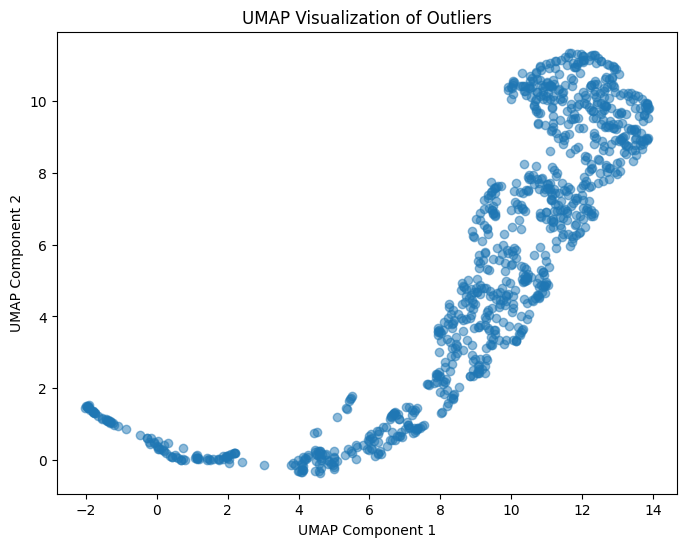

In [ ]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_train_final)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualization of Outliers")
plt.show()


The above graph is the 2D view of the 50 dimensional data. From The data we can see the data features are not uniformly distributed accross the entire region.

### Applying DBSCAN to check the outliers
Use the UMAP to identify outliers in the data with DBSCAN!

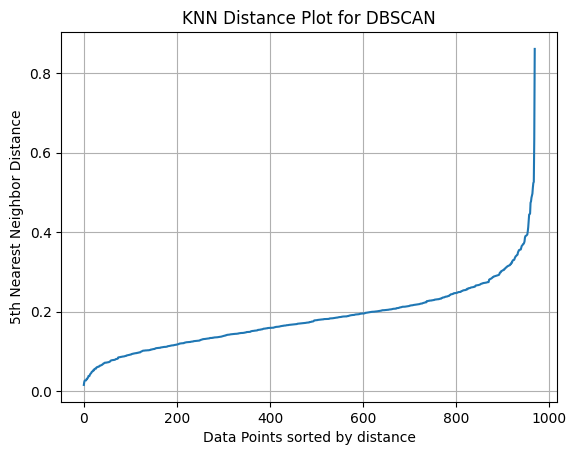

In [ ]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_umap)
distances, indices = nbrs.kneighbors(X_umap)

# Sort and plot the distances to find the "elbow" point
distances = np.sort(distances[:, 4])  # 5th nearest neighbor
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("KNN Distance Plot for DBSCAN")
plt.grid(True)
plt.show()

Why k=5?
- In DBSCAN, the eps parameter determines how close points need to be to form a cluster. To find the optimal eps, we use the k-nearest neighbors (KNN) distance plot, where we sort and plot the distances of each point's k-th nearest neighbor.
- According to the graph, by using elbow method, we can set the eps value to around 0.2 and 0.4

DBSCAN
- Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [ ]:
eps_value = 0.28 # Elbow Method
min_samples_values = [3, 4, 5, 6, 7, 8, 9, 10]

best_score = -1
best_min_samples = None
best_labels = None

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples).fit(X_umap)
    labels = dbscan.labels_

    # Ignore silhouette score for cases where all points are one cluster (-1 = noise)
    if len(set(labels)) > 1:
        score = silhouette_score(X_umap, labels)
        print(f"min_samples={min_samples}, Silhouette Score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_min_samples = min_samples
            best_labels = labels

print(f"Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score:.4f}")

min_samples=3, Silhouette Score: 0.0545
min_samples=4, Silhouette Score: 0.2424
min_samples=5, Silhouette Score: 0.3043
min_samples=6, Silhouette Score: 0.1532
min_samples=7, Silhouette Score: 0.2091
min_samples=8, Silhouette Score: 0.2543
min_samples=9, Silhouette Score: 0.2670
min_samples=10, Silhouette Score: 0.1857
Best min_samples: 5, Best Silhouette Score: 0.3043


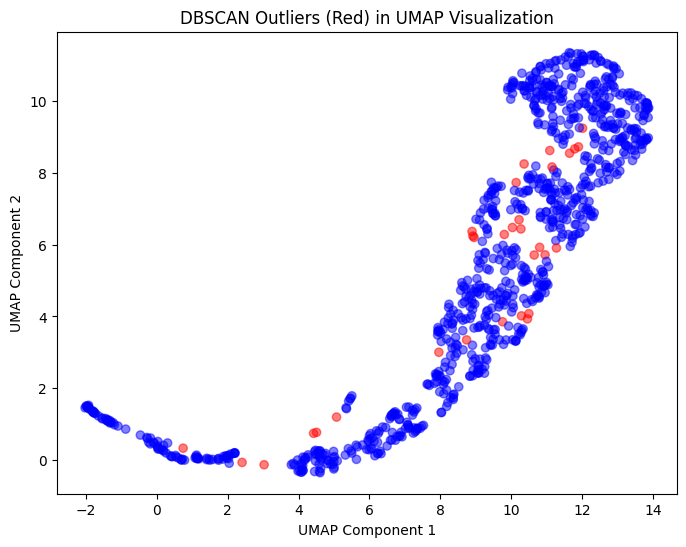

In [ ]:
# Applying DBSCAN with optimal parameters
dbscan = DBSCAN(eps=eps_value, min_samples=best_min_samples).fit(X_umap)
labels = dbscan.labels_

# Color mapping: Outliers (-1) in red, clusters in blue
colors = ['red' if label == -1 else 'blue' for label in labels]

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors, alpha=0.5)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("DBSCAN Outliers (Red) in UMAP Visualization")
plt.show()


### Filter out the outliers (Not Applied)

In [ ]:
X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

((970, 30), (243, 30), (970, 2), (243, 2))

In [ ]:
# # Filter out outliers (label == -1)

# outlier_mask = labels != -1  # Create a mask for non-outliers
# X_umap_cleaned = X_umap[outlier_mask]  # Keep only non-outliers

# # Remove outliers in Train
# X_train_final = X_train_final[outlier_mask]
# y_train = y_train.iloc[outlier_mask]

In [ ]:
# X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

In [ ]:
# # Scatter plot of cleaned data without outliers

# plt.figure(figsize=(8, 6))
# plt.scatter(X_umap_cleaned[:, 0], X_umap_cleaned[:, 1], alpha=0.5)
# plt.xlabel("UMAP Component 1")
# plt.ylabel("UMAP Component 2")
# plt.title("UMAP Visualization After Removing Outliers")
# plt.show()

- if KernelPCA component is changed, must change the parameter of DBSCAN as well.
- However, after testing the models, I found that data with the presense of data (which I thought the outliers) generate better performance.
- Based on this finding, the data which I demonstrated as outliers are not outliers at all. They gave valuable information for the model to make correct predictions.


So, I have not included the outliers removal in this stage.

## Train/ Valid / Test Splitting

- Training Data will be only used to fit the model to learn pattern.
- Validation Data will be only used to find the best hyperparameters for the respective models.
- Testing Data will be only used to predict the unseen data and to evaluate the performance of the respective model.

In [ ]:
X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

((970, 30), (243, 30), (970, 2), (243, 2))

In [ ]:
X_train_final, X_val_final, y_train, y_val = train_test_split(
    X_train_final, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train[['ADHD_Outcome', 'Sex_F']]
)

In [ ]:
X_train_final.shape, X_test_final.shape, X_val_final.shape, y_train.shape, y_test.shape, y_val.shape

((776, 30), (243, 30), (194, 30), (776, 2), (243, 2), (194, 2))

## Download the Preprocessed Data

In [ ]:
data_dict = {
    'X_train': X_train_final,
    'X_test': X_test_final,
    'X_val': X_val_final,
    'y_train': y_train,
    'y_test': y_test,
    'y_val': y_val
}
with open('processed_data_final.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

# End of the EDA Stage


# Thank you for taking the time to give feedback!

Best Regards
- Tun Ye Minn